# Machine Learning Project 2022/2023 - Group 60 2 Version

***
# 1. Loading Data
<ul>
    <li>Import necessary libraries</li>
    <li>Merge trainning data and testing data in two distinct tables</li>   
</ul>

***

In [1]:
%autosave 90

# Basic libraries: numpy and pandasfor data handling, pyplot 
# and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import classification_report
import os
from PIL import Image
import requests
from sklearn.metrics import log_loss

# Data split
from sklearn.model_selection import train_test_split

# Scaling methods and categorical variable encoder
from sklearn.preprocessing import LabelEncoder

# Model selection 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score ,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Addicional 
from datetime import datetime
from datetime import date


Autosaving every 90 seconds


In [2]:
# Training data

train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

# Testing data

test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')


In [3]:
# Join all the trainning data in 1 dataframe 

#train_demo.set_index('PatientID')
#train_habits.set_index('PatientID')
#train_health.set_index('PatientID')

train_full = pd.merge(pd.merge(train_demo, train_habits, on = 'PatientID'), train_health, on='PatientID')
#train_full.set_index('PatientID', inplace=True)
train_data = train_full.copy()

In [4]:
# Join all the testing data in 1 dataframe

#test_demo.set_index('PatientID')
#test_habits.set_index('PatientID')
#test_health.set_index('PatientID')

test_full = pd.merge(pd.merge(test_demo, test_habits, on='PatientID'), test_health, on='PatientID')
#test_full.set_index('PatientID', inplace=True)
test_data = test_full.copy()

In [5]:
# Checking how the training dataframe is

train_data.head().style

In [6]:
# Checking how the testing dataframe is

train_data.head().style

***
# 2. Data Preprocessing
<ul>
    <li>Check Null and cleaning it</li>
    <li>Check the existance of Outliers</li>
    <li>Check the spearman correlation between variables</li>
    <li>Change the categorical variables into numeric variables</li>
</ul>

***   

In [7]:
# check for null values

train_data.isnull().sum()

PatientID            0
Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

In [8]:
# visual null values

train_data[train_data['Education'].isnull()]

PatientID                  Name  Birth_Year         Region Education  \
5         1653     Mr. David Lamothe        1966  East Midlands       NaN   
54        1085    Mr. Robert Swenson        1978     South West       NaN   
86        1048  Mrs. Margaret Wysong        1956  East Midlands       NaN   
124       1128     Mr. John Castillo        1970     South East       NaN   
239       1241     Mr. Tommy Jenkins        1955         London       NaN   
286       1195         Mr. John Hess        1963         London       NaN   
341       1296     Mr. Terry Roberts        1955     South East       NaN   
355       1904   Mr. Manuel Rothwell        1967  East Midlands       NaN   
432       1664     Mrs. Jan Campbell        1956  East Midlands       NaN   
436       1802         Mrs. Mary Rey        1959     South West       NaN   
468       1618        Mr. Dana Morse        1973     South West       NaN   
502       1831         Mr. Levi Auld        1964         London       NaN   
648       1072     Mr. Steven Fisher        1866  East Midlands       NaN   

     Disease Smoking_Habit                       Drinking_Habit Exercise  \
5          0           Yes   I consider myself a social drinker      Yes   
54         1            No  I usually consume alcohol every day       No   
86         1            No   I consider myself a social drinker       No   
124        1            No  I usually consume alcohol every day       No   
239        0            No   I consider myself a social drinker       No   
286        1           Yes  I usually consume alcohol every day       No   
341        0            No  I usually consume alcohol every day       No   
355        1            No  I usually consume alcohol every day       No   
432        1            No  I usually consume alcohol every day       No   
436        0            No  I usually consume alcohol every day      Yes   
468        1            No  I usually consume alcohol every day       No   
502        1            No  I usually consume alcohol every day       No   
648        0           Yes   I consider myself a social drinker      Yes   

                                         Fruit_Habit  \
5    Less than 1. I do not consume fruits every day.   
54   Less than 1. I do not consume fruits every day.   
86                 1 to 2 pieces of fruit in average   
124                    More than six pieces of fruit   
239  Less than 1. I do not consume fruits every day.   
286  Less than 1. I do not consume fruits every day.   
341  Less than 1. I do not consume fruits every day.   
355  Less than 1. I do not consume fruits every day.   
432  Less than 1. I do not consume fruits every day.   
436  Less than 1. I do not consume fruits every day.   
468  Less than 1. I do not consume fruits every day.   
502                    More than six pieces of fruit   
648                1 to 2 pieces of fruit in average   

                                        Water_Habit  Height  Weight  \
5    More than half a liter but less than one liter     167      49   
54                 Between one liter and two liters     165      72   
86   More than half a liter but less than one liter     166      67   
124                          Less than half a liter     167      74   
239                          Less than half a liter     172      55   
286                Between one liter and two liters     174      84   
341                Between one liter and two liters     162      54   
355  More than half a liter but less than one liter     178      82   
432  More than half a liter but less than one liter     167      50   
436                Between one liter and two liters     151      47   
468                          Less than half a liter     172      82   
502                Between one liter and two liters     178      71   
648                Between one liter and two liters     171      62   

     High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
5       

In [9]:
# Remove Nulls
train_data.dropna(inplace = True)

# Check data without nulls
train_data.isnull().sum()

PatientID           0
Name                0
Birth_Year          0
Region              0
Education           0
Disease             0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
dtype: int64

In [10]:
# Investigate all elements within each feacture

for column in train_data:
    unique_values = np.unique(train_data[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print('The number of values for feature {} is: {} -- {}'.format(column, nr_values, unique_values))
    else:
        print('The number of values for feature {} is: {}'.format(column, nr_values))
    
    

The number of values for feature PatientID is: 787
The number of values for feature Name is: 786
The number of values for feature Birth_Year is: 49
The number of values for feature Region is: 10
The number of values for feature Education is: 6 -- ['Elementary School (1st to 9th grade)' 'High School Graduate'
 'High School Incomplete (10th to 11th grade)'
 'I never attended school / Other' 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)']
The number of values for feature Disease is: 2 -- [0 1]
The number of values for feature Smoking_Habit is: 2 -- ['No' 'Yes']
The number of values for feature Drinking_Habit is: 3 -- ['I consider myself a social drinker'
 'I do not consume any type of alcohol'
 'I usually consume alcohol every day']
The number of values for feature Exercise is: 2 -- ['No' 'Yes']
The number of values for feature Fruit_Habit is: 5 -- ['1 to 2 pieces of fruit in average' '3 to 4 pieces of fruit in average'
 '5 to 6 pieces of fruit in average'

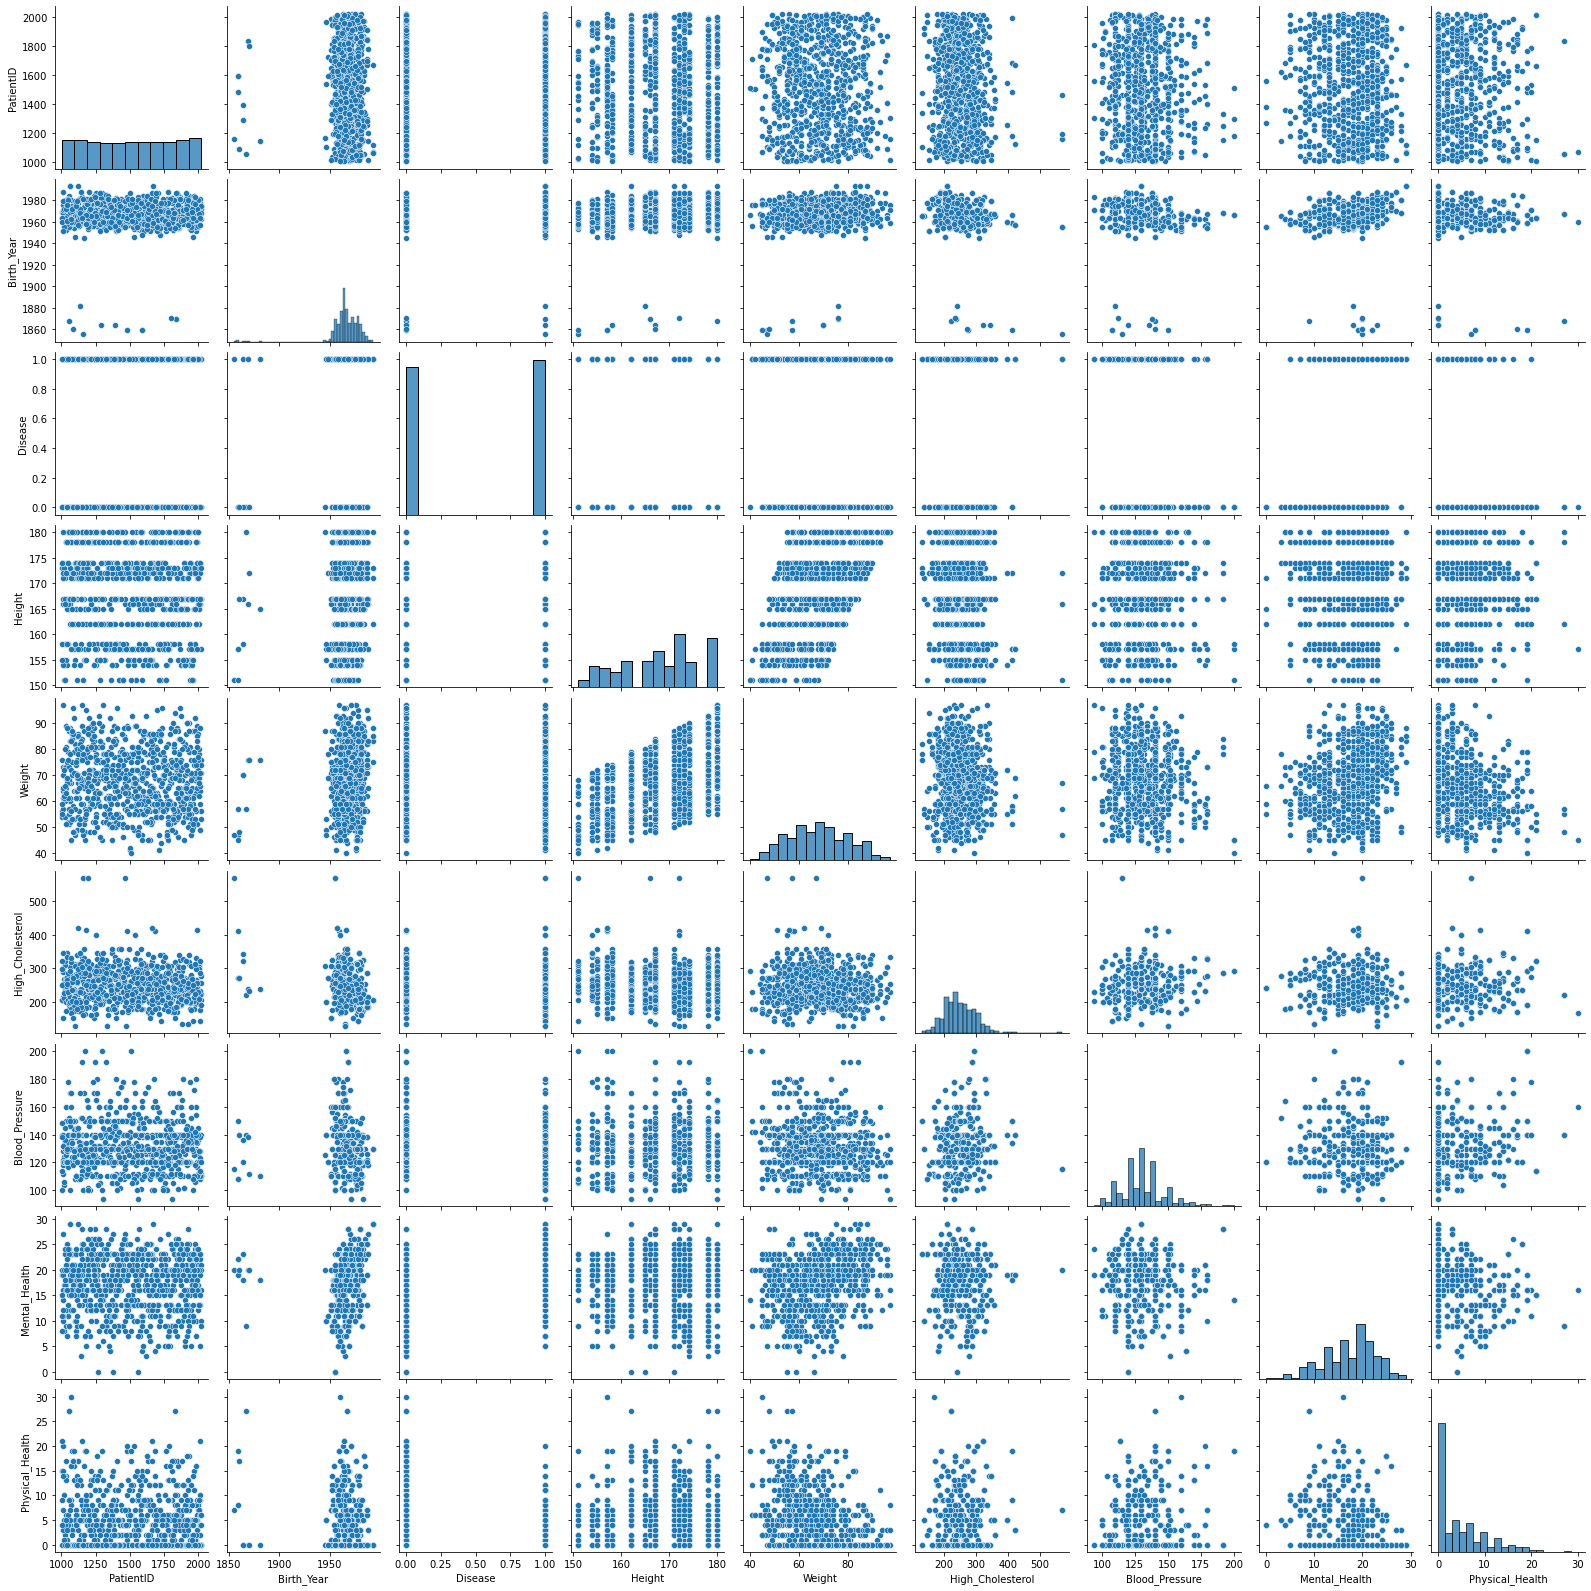

In [11]:
# Visualize the data using pairplots

pairplots = sns.pairplot(train_data)


***
# 3. Data Cleaning
<ul>
    <li>Changing capital words</li>
    <li>Removing outliers</li>
    <li>Change categorical variables into numeric representation</li>
</ul>


***

In [12]:
# Change the LONDON to London in Training df

train_data['Region'] = train_data['Region'].replace(['LONDON'], 'London')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 0 to 799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         787 non-null    int64 
 1   Name              787 non-null    object
 2   Birth_Year        787 non-null    int64 
 3   Region            787 non-null    object
 4   Education         787 non-null    object
 5   Disease           787 non-null    int64 
 6   Smoking_Habit     787 non-null    object
 7   Drinking_Habit    787 non-null    object
 8   Exercise          787 non-null    object
 9   Fruit_Habit       787 non-null    object
 10  Water_Habit       787 non-null    object
 11  Height            787 non-null    int64 
 12  Weight            787 non-null    int64 
 13  High_Cholesterol  787 non-null    int64 
 14  Blood_Pressure    787 non-null    int64 
 15  Mental_Health     787 non-null    int64 
 16  Physical_Health   787 non-null    int64 
 17  Checkup         

In [13]:
# Deleting the outliers

train_data[train_data['Birth_Year'] < 1900]

PatientID                     Name  Birth_Year                    Region  \
18        1591         Mrs. Ashley Pena        1859  Yorkshire and the Humber   
61        1481          Mrs. Lisa Cooks        1859             East Midlands   
93        1288   Mrs. Minnie Hirschfeld        1864  Yorkshire and the Humber   
198       1139            Mr. Gary Baca        1881             East Midlands   
312       1158  Mrs. Mary Hollingsworth        1855                South West   
493       1593        Mrs. Nicole Ronin        1859                North East   
566       1055      Mr. Douglas Salters        1867             East Midlands   
593       1836        Mrs. Sharyn Furst        1869             West Midlands   
640       1803      Mr. Kenneth Ferraro        1870           East of England   
705       1390       Mrs. Susan Bullard        1864             East Midlands   
797       1088       Mrs. Cheryl Harris        1860             East Midlands   

                                       Education  Disease Smoking_Habit  \
18          Elementary School (1st to 9th grade)        0            No   
61                          High School Graduate        0            No   
93   High School Incomplete (10th to 11th grade)        1            No   
198         University Incomplete (1 to 2 years)        1            No   
312         Elementary School (1st to 9th grade)        1            No   
493         Elementary School (1st to 9th grade)        0            No   
566         Elementary School (1st to 9th grade)        0            No   
593                         High School Graduate        1            No   
640                         High School Graduate        0            No   
705         Elementary School (1st to 9th grade)        0           Yes   
797         Elementary School (1st to 9th grade)        0            No   

                          Drinking_Habit Exercise  \
18   I usually consume alcohol every day      Yes   
61    I consider myself a social drinker       No   
93   I usually consume alcohol every day       No   
198  I usually consume alcohol every day       No   
312   I consider myself a social drinker       No   
493  I usually consume alcohol every day      Yes   
566  I usually consume alcohol every day      Yes   
593   I consider myself a social drinker       No   
640  I usually consume alcohol every day       No   
705   I consider myself a social drinker       No   
797   I consider myself a social drinker       No   

                                         Fruit_Habit  \
18                 3 to 4 pieces of fruit in average   
61                 5 to 6 pieces of fruit in average   
93   Less than 1. I do not consume fruits every day.   
198  Less than 1. I do not consume fruits every day.   
312  Less than 1. I do not consume fruits every day.   
493                3 to 4 pieces of fruit in average   
566  Less than 1. I do not consume fruits every day.   
593  Less than 1. I do not consume fruits every day.   
640                1 to 2 pieces of fruit in average   
705                3 to 4 pieces of fruit in average   
797                3 to 4 pieces of fruit in average   

                                        Water_Habit  Height  Weight  \
18   More than half a liter but less than one liter     157      47   
61   More than half a liter but less than one liter     157      57   
93                 Between one liter and two liters     167      70   
198                Between one liter and two liters     165      76   
312  More than half a liter but less than one liter     151      47   
493  More than half a liter but less than one liter     151      45   
566                          Less than half a liter     180      57   
593  More than half a liter but less than one liter     166      76   
640                Between one liter and two liters     172      76   
705                Between one liter and two liters     158      70   
797  More than half a liter but less tha

In [14]:
# Droping elements that have been born after 1900 once we ca check that are outliers

train_data = train_data[train_data['Birth_Year'] > 1900]

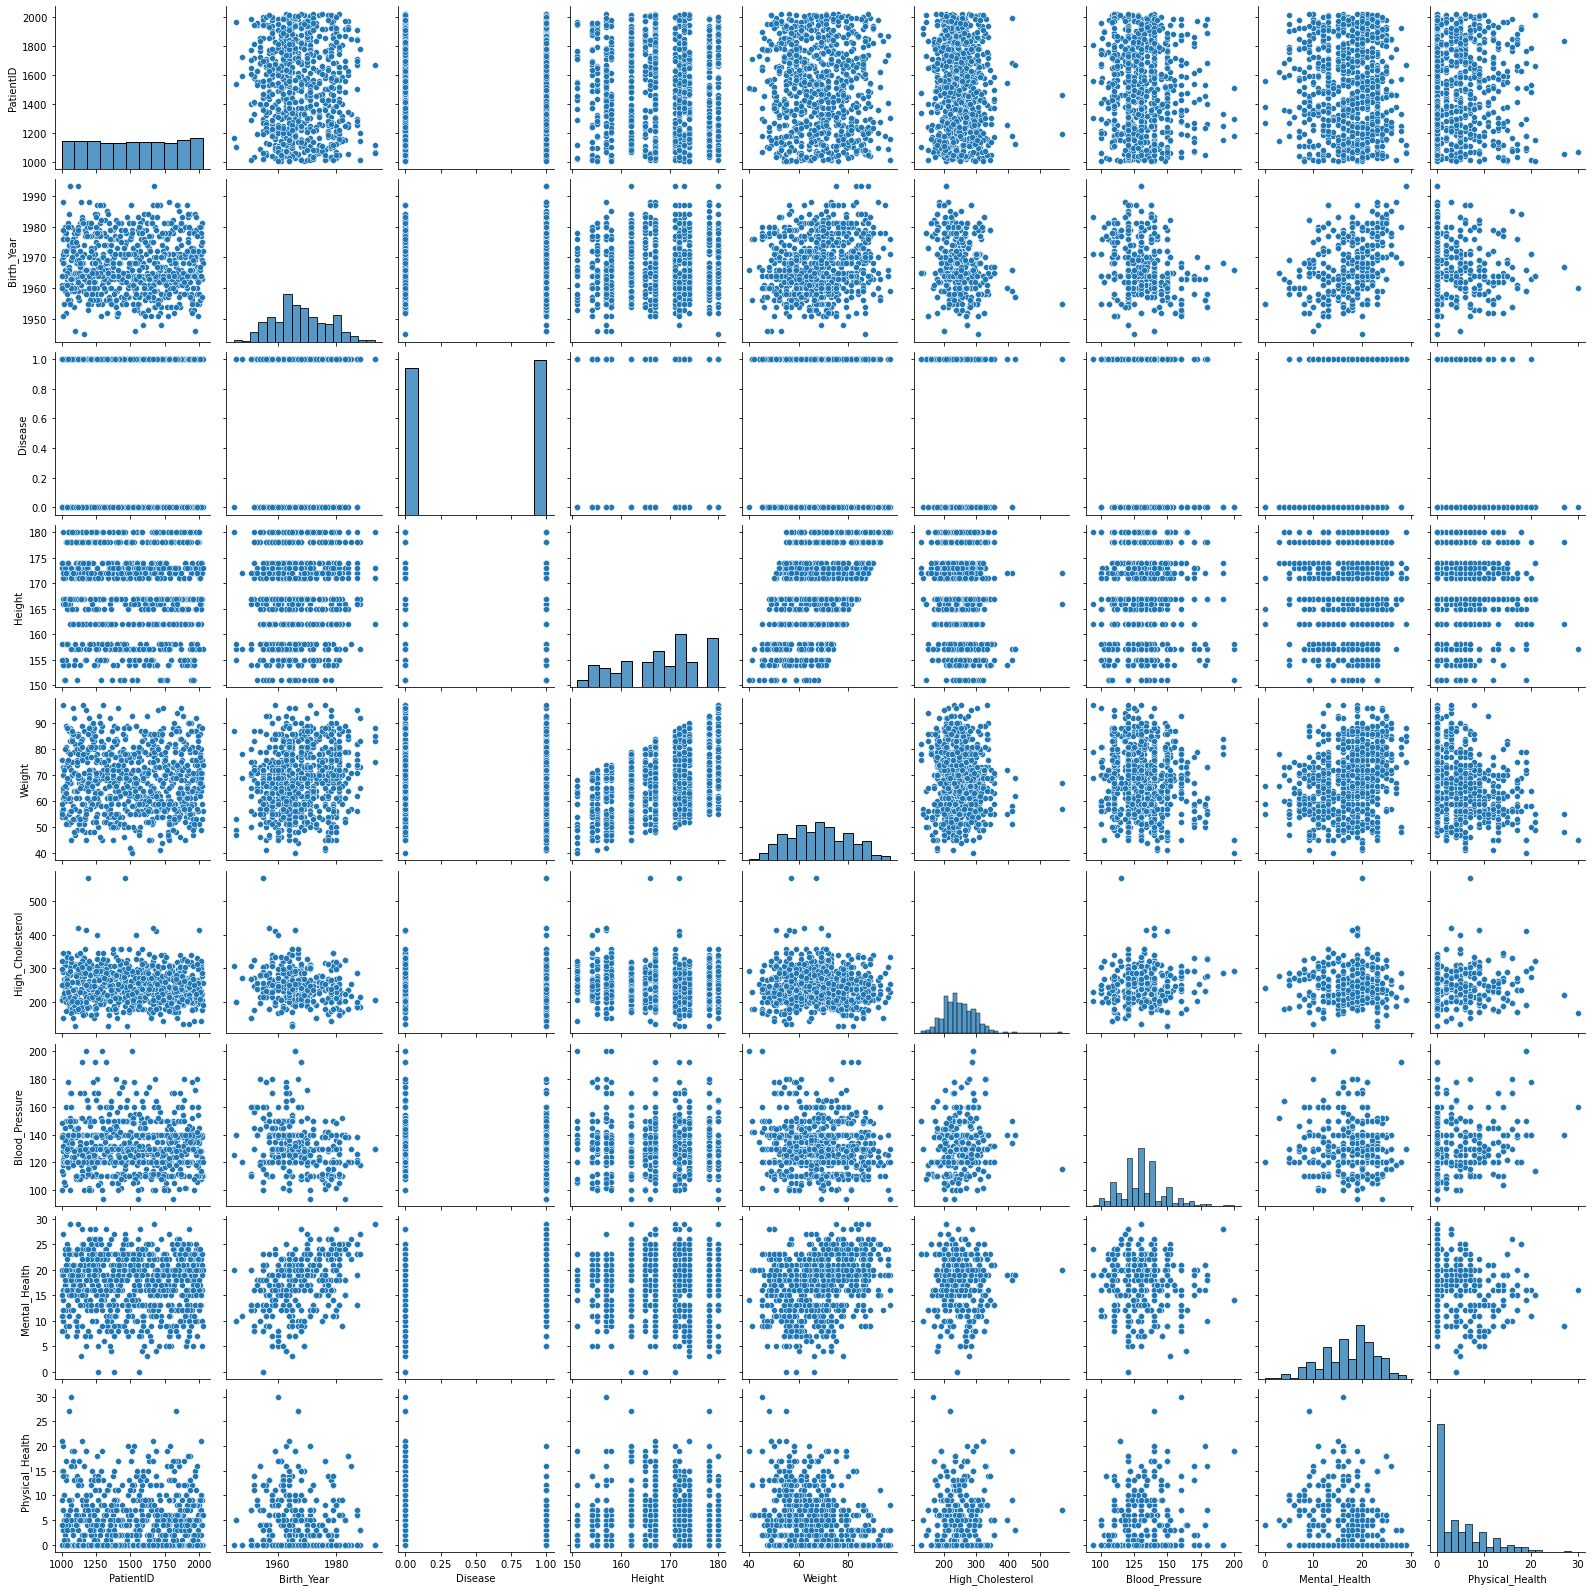

In [15]:
# Visualize the data using pairplots

pairplots = sns.pairplot(train_data)


In [16]:
# We also can regard patients with cholesterol of more then 500 as outliers

train_data[train_data['High_Cholesterol'] > 500]

PatientID                  Name  Birth_Year         Region  \
22        1464    Mrs. Jeanne Rogers        1955  East Midlands   
729       1192  Mrs. Karen Smallidge        1955         London   

                                       Education  Disease Smoking_Habit  \
22   High School Incomplete (10th to 11th grade)        1            No   
729              I never attended school / Other        1            No   

                         Drinking_Habit Exercise  \
22   I consider myself a social drinker       No   
729  I consider myself a social drinker       No   

                                         Fruit_Habit  \
22   Less than 1. I do not consume fruits every day.   
729  Less than 1. I do not consume fruits every day.   

                          Water_Habit  Height  Weight  High_Cholesterol  \
22   Between one liter and two liters     166      57               568   
729  Between one liter and two liters     172      67               568   

     Blood_Pressure  Mental_Health  Physical_Health   Checkup  \
22              115             20                7  Not sure   
729             115             20                7  Not sure   

                                              Diabetes  
22   I have/had pregnancy diabetes or borderline di...  
729  I have/had pregnancy diabetes or borderline di...

In [17]:
# Drop 500+ cholesterol patients
train_data = train_data[train_data['High_Cholesterol'] < 500]

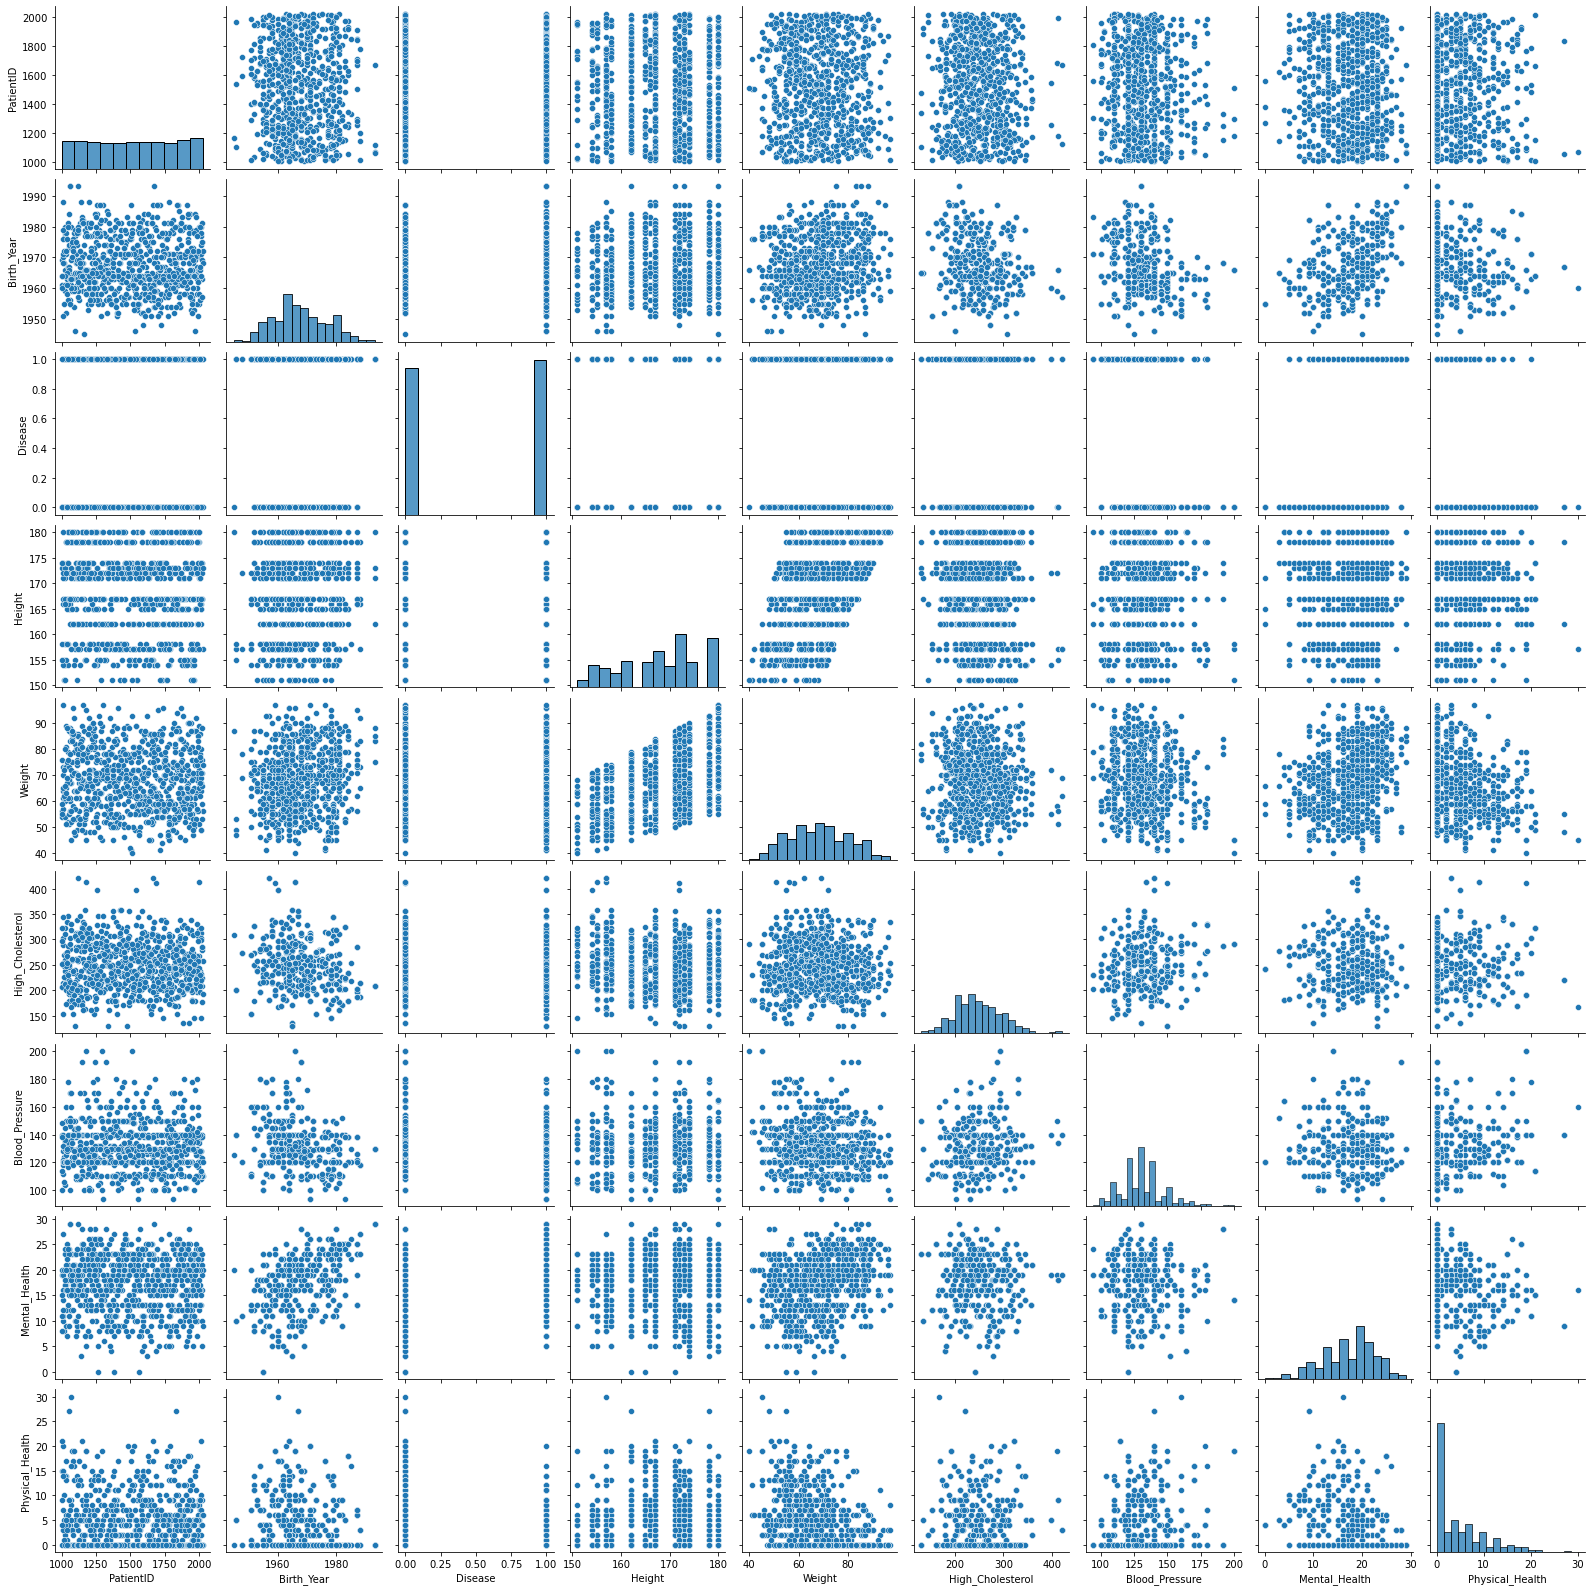

In [18]:
pairplots = sns.pairplot(train_data)

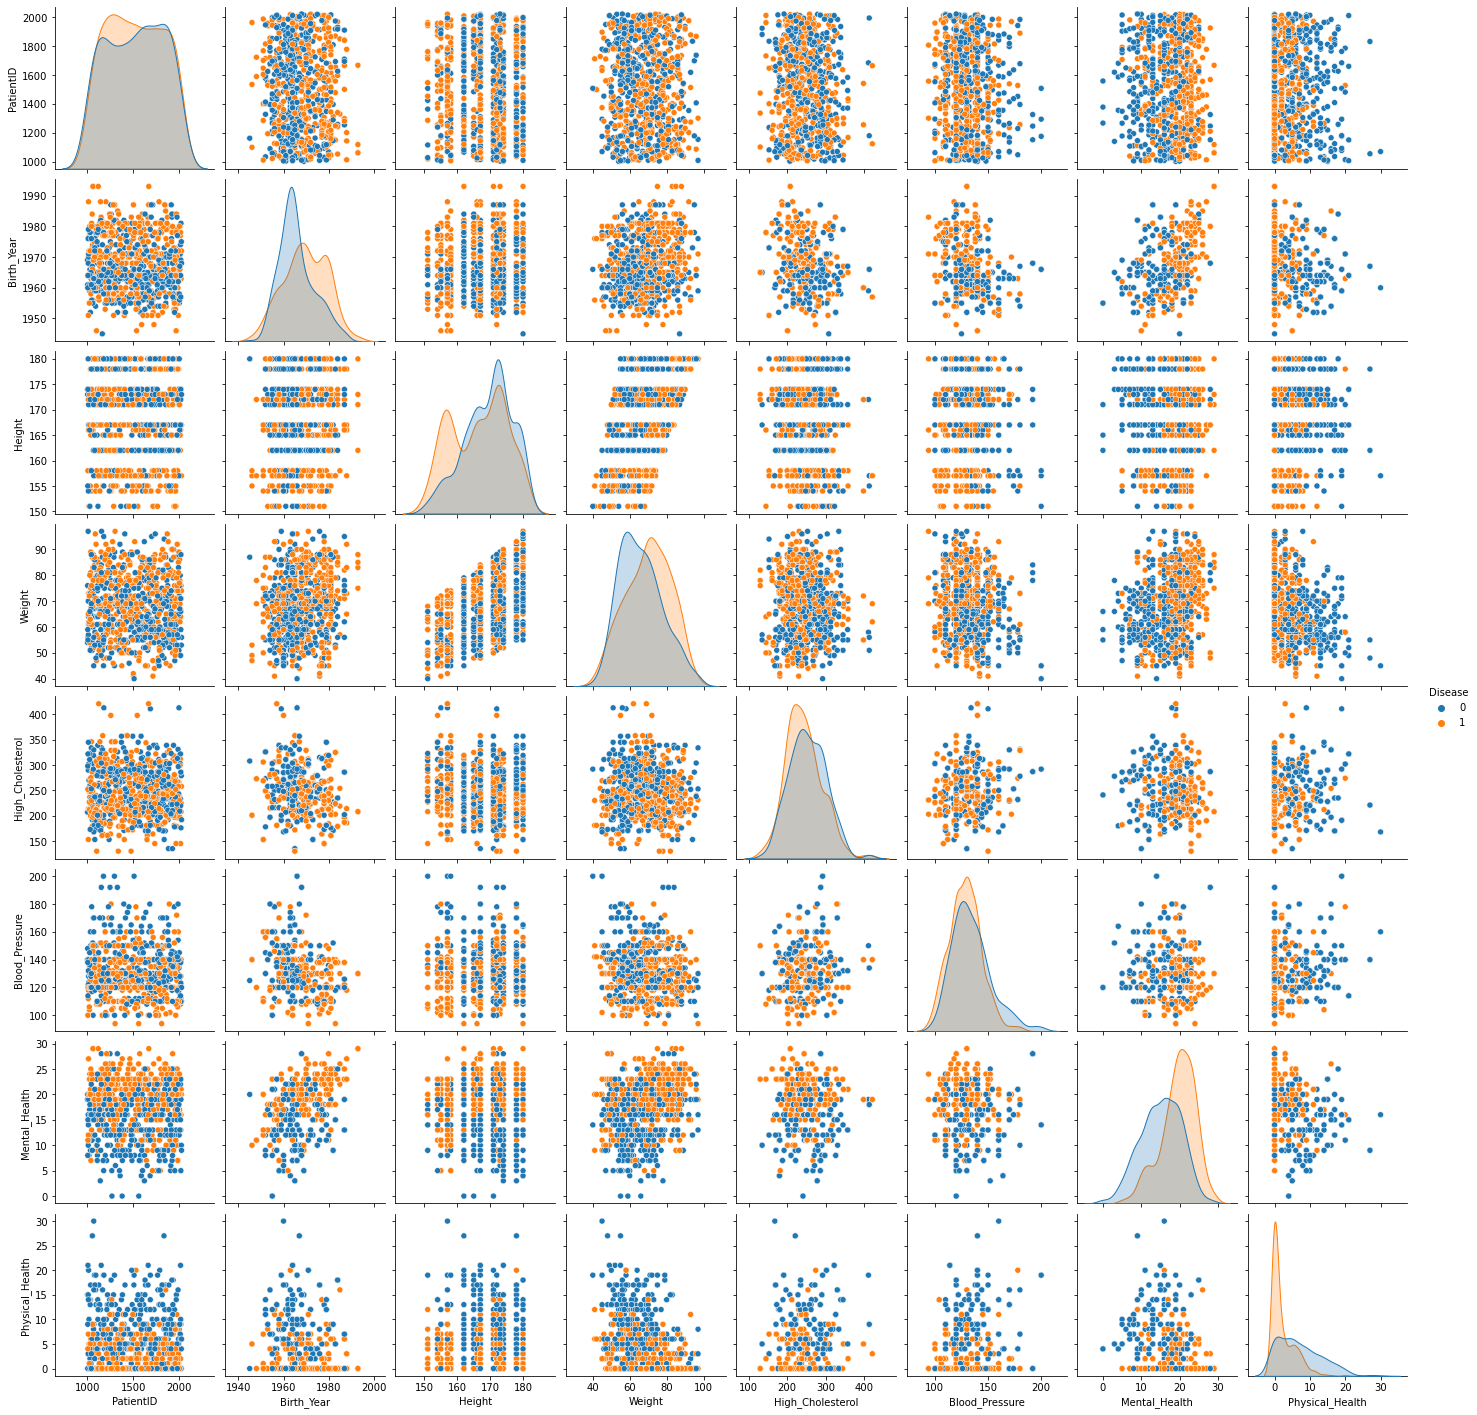

In [19]:
# First Visual Correlations with variable Disease

pairplots_disease = sns.pairplot(train_data, hue = 'Disease')

In [20]:
# By spearman correlation we can check correlation between each element

correlation_spearman = train_data.corr('spearman').style.background_gradient(cmap="Blues")
correlation_spearman

We can check that variable y (Disease) is balanced


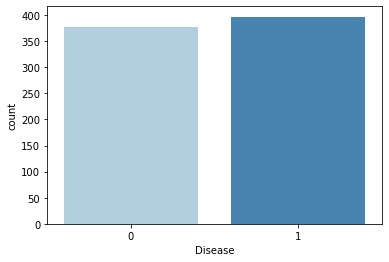

In [37]:
# Investigate the dist of y

sns.countplot(x = 'Disease', data = train_data, palette = 'Blues')
print('\033[1mWe can check that variable y (Disease) is balanced\033[0m')


In [22]:
# Change Yes and No to 1 and 0s

train_data['Exercise'] = train_data['Exercise'].map({'Yes': 1, 'No': 0})
train_data['Smoking_Habit'] = train_data['Smoking_Habit'].map({'Yes': 1, 'No': 0})
train_data

PatientID                    Name  Birth_Year                    Region  \
0         1167      Mrs. Stephanie Gay        1965                    London   
1         1805        Mr. Sherman Nero        1969                South West   
2         1557         Mr. Mark Boller        1974  Yorkshire and the Humber   
3         1658        Mr. David Caffee        1958                    London   
4         1544        Mr. Gerald Emery        1968                South East   
..         ...                     ...         ...                       ...   
794       1912      Mr. Mike Jefferson        1987  Yorkshire and the Humber   
795       1909        Mr. Philip Klink        1972             East Midlands   
796       1386    Mrs. Jackie Valencia        1980                North West   
798       1662   Mr. Florencio Doherty        1975           East of England   
799       1117  Mr. Freddie Vermillion        1979                    London   

                                       Education  Disease  Smoking_Habit  \
0    High School Incomplete (10th to 11th grade)        1              0   
1    High School Incomplete (10th to 11th grade)        1              0   
2           Elementary School (1st to 9th grade)        1              0   
3          University Complete (3 or more years)        0              0   
4           University Incomplete (1 to 2 years)        1              0   
..                                           ...      ...            ...   
794                         High School Graduate        0              0   
795  High School Incomplete (10th to 11th grade)        0              0   
796         Elementary School (1st to 9th grade)        1              0   
798         Elementary School (1st to 9th grade)        1              0   
799         Elementary School (1st to 9th grade)        0              0   

                          Drinking_Habit  Exercise  \
0    I usually consume alcohol every day         1   
1     I consider myself a social drinker         1   
2     I consider myself a social drinker         0   
3    I usually consume alcohol every day         1   
4     I consider myself a social drinker         0   
..                                   ...       ...   
794  I usually consume alcohol every day         1   
795   I consider myself a social drinker         1   
796  I usually consume alcohol every day         0   
798  I usually consume alcohol every day         0   
799   I consider myself a social drinker         1   

                                         Fruit_Habit  \
0    Less than 1. I do not consume fruits every day.   
1    Less than 1. I do not consume fruits every day.   
2    Less than 1. I do not consume fruits every day.   
3    Less than 1. I do not consume fruits every day.   
4                  1 to 2 pieces of fruit in average   
..                                               ...   
794  Less than 1. I do not consume fruits every day.   
795  Less than 1. I do not consume fruits every day.   
796  Less than 1. I do not consume fruits every day.   
798  Less than 1. I do not consume fruits every day.   
799  Less than 1. I do not consume fruits every day.   

                                        Water_Habit  Height  Weight  \
0                  Between one liter and two liters     155      67   
1                  Between one liter and two liters     173      88   
2    More than half a liter but less than one liter     162      68   
3    More than half a liter but less than one liter     180      66   
4    More than half a liter but less than one liter     180      58   
..                                              ...     ...     ...   
794                Between one liter and two liters     173      74   
795                Between one liter and two liters     178      61   
796                Between one liter and two liters     157      61   
798  More than half a liter but less than one liter     165      75   
799                         

In [23]:
# Separate names with Patient ID for a separated DataFrame 

PatientNameID = train_data[['PatientID','Name']]
PatientNameID

# Drop Name, once those are already saved in other df, in order to have only numerica features 
train_data.drop('Name', axis= 1, inplace = True)


In [26]:
# Change categorical variables into numeric representation

categorical_features = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
train_data = pd.get_dummies(train_data, columns = categorical_features)
train_data

PatientID  Birth_Year  Disease  Smoking_Habit  Exercise  Height  Weight  \
0         1167        1965        1              0         1     155      67   
1         1805        1969        1              0         1     173      88   
2         1557        1974        1              0         0     162      68   
3         1658        1958        0              0         1     180      66   
4         1544        1968        1              0         0     180      58   
..         ...         ...      ...            ...       ...     ...     ...   
794       1912        1987        0              0         1     173      74   
795       1909        1972        0              0         1     178      61   
796       1386        1980        1              0         0     157      61   
798       1662        1975        1              0         0     165      75   
799       1117        1979        0              0         1     173      70   

     High_Cholesterol  Blood_Pressure  Mental_Health  ...  \
0                 358             120             21  ...   
1                 230             142              9  ...   
2                 226             122             26  ...   
3                 313             125             13  ...   
4                 277             125             18  ...   
..                ...             ...            ...  ...   
794               202             120             13  ...   
795               204             144             12  ...   
796               213             120             23  ...   
798               208             112             16  ...   
799               181             120             11  ...   

     Water_Habit_Less than half a liter  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
..                                  ...   
794                                   0   
795                                   0   
796                                   0   
798                                   0   
799                                   1   

     Water_Habit_More than half a liter but less than one liter  \
0                                                    0            
1                                                    0            
2                                                    1            
3                                                    1            
4                                                    1            
..                                                 ...            
794                                                  0            
795                                                  0            
796                                                  0            
798                                                  1            
799                                                  0            

     Checkup_Less than 3 years but more than 1 year  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
..                                              ...   
794                                               0   
795                                               0   
796                                               0   
798                                               0   
799                                               0   

     Checkup_Less than three months  Checkup_More than 3 years  \
0                                 0                          1   
1                                 0                          0   
2                                 0                          1   
3                                 0                          0  

In [27]:
# Split the data into x and y

x = train_data.drop(['Disease'], axis = 1).values 
y = train_data['Disease']

In [28]:
DecisionTree = DecisionTreeClassifier(random_state=15, criterion= 'entropy', max_depth=10)
DecisionTree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [34]:
# Feature Importance

fi_col = []
fi = []

for i,column in enumerate(train_data.drop(['Disease'], axis = 1)):
    fi_col.append(column)
    fi.append(DecisionTree.feature_importances_[i])

fi_DecisionTree = pd.DataFrame(zip(fi_col, fi), columns = ['Feature','Feature Importance'])
fi_DecisionTree = fi_DecisionTree.sort_values('Feature Importance', ascending = False).reset_index()
fi_DecisionTree

index                                            Feature  \
0      38                          Checkup_More than 3 years   
1       1                                         Birth_Year   
2      43  Diabetes_Neither I nor my immediate family hav...   
3       8                                      Mental_Health   
4      31  Fruit_Habit_Less than 1. I do not consume frui...   
5       6                                   High_Cholesterol   
6       9                                    Physical_Health   
7       7                                     Blood_Pressure   
8       5                                             Weight   
9      28      Fruit_Habit_1 to 2 pieces of fruit in average   
10      4                                             Height   
11     42  Diabetes_I have/had pregnancy diabetes or bord...   
12     25  Drinking_Habit_I consider myself a social drinker   
13     36     Checkup_Less than 3 years but more than 1 year   
14     27  Drinking_Habit_I usually consume alcohol every...   
15      3                                           Exercise   
16      2                                      Smoking_Habit   
17     20                     Education_High School Graduate   
18     39                                   Checkup_Not sure   
19     35  Water_Habit_More than half a liter but less th...   
20     34                 Water_Habit_Less than half a liter   
21     33       Water_Habit_Between one liter and two liters   
22     32          Fruit_Habit_More than six pieces of fruit   
23     40                        Diabetes_I do have diabetes   
24     30      Fruit_Habit_5 to 6 pieces of fruit in average   
25     41  Diabetes_I don't have diabetes, but I have dir...   
26     29      Fruit_Habit_3 to 4 pieces of fruit in average   
27     37                     Checkup_Less than three months   
28      0                                          PatientID   
29     26  Drinking_Habit_I do not consume any type of al...   
30     24     Education_University Incomplete (1 to 2 years)   
31     23    Education_University Complete (3 or more years)   
32     21  Education_High School Incomplete (10th to 11th...   
33     19     Education_Elementary School (1st to 9th grade)   
34     18                    Region_Yorkshire and the Humber   
35     17                               Region_West Midlands   
36     16                                  Region_South West   
37     15                                  Region_South East   
38     14                                  Region_North West   
39     13                                  Region_North East   
40     12                                      Region_London   
41     11                             Region_East of England   
42     10                               Region_East Midlands   
43     22          Education_I never attended school / Other   

    Feature Importance  
0             0.217233  
1             0.132016  
2             0.115950  
3             0.093315  
4             0.090354  
5             0.086379  
6             0.075102  
7             0.042721  
8             0.034808  
9             0.024408  
10            0.019305  
11            0.016947  
12            0.014222  
13            0.011082  
14            0.009067  
15            0.006778  
16            0.005647  
17            0.004666  
18            0.000000  
19            0.000000  
20            0.000000  
21            0.000000  
22            0.000000  
23            0.000000  
24            0.000000  
25            0.000000  
26            0.000000  
27            0.000000  
28            0.000000  
29            0.000000  
30            0.000000  
31            0.000000  
32            0.000000  
33            0.000000  
34            0.000000  
35            0.000000  
36            0.000000  
37            0.000000  
38            0.000000  
39            0.000000  
40            0.000000  
41            0.000000  
42            0.000000  
43            0.000000

In [30]:
# Creating list of columns to keep, only include feactures that contribute to model prediction
# Only regarding Importance above 0.02

DecisionTree_columns_to_keep = fi_DecisionTree['Feature'][0:10]

DecisionTree_columns_to_keep




0                            Checkup_More than 3 years
1                                           Birth_Year
2    Diabetes_Neither I nor my immediate family hav...
3                                        Mental_Health
4    Fruit_Habit_Less than 1. I do not consume frui...
5                                     High_Cholesterol
6                                      Physical_Health
7                                       Blood_Pressure
8                                               Weight
9        Fruit_Habit_1 to 2 pieces of fruit in average
Name: Feature, dtype: object

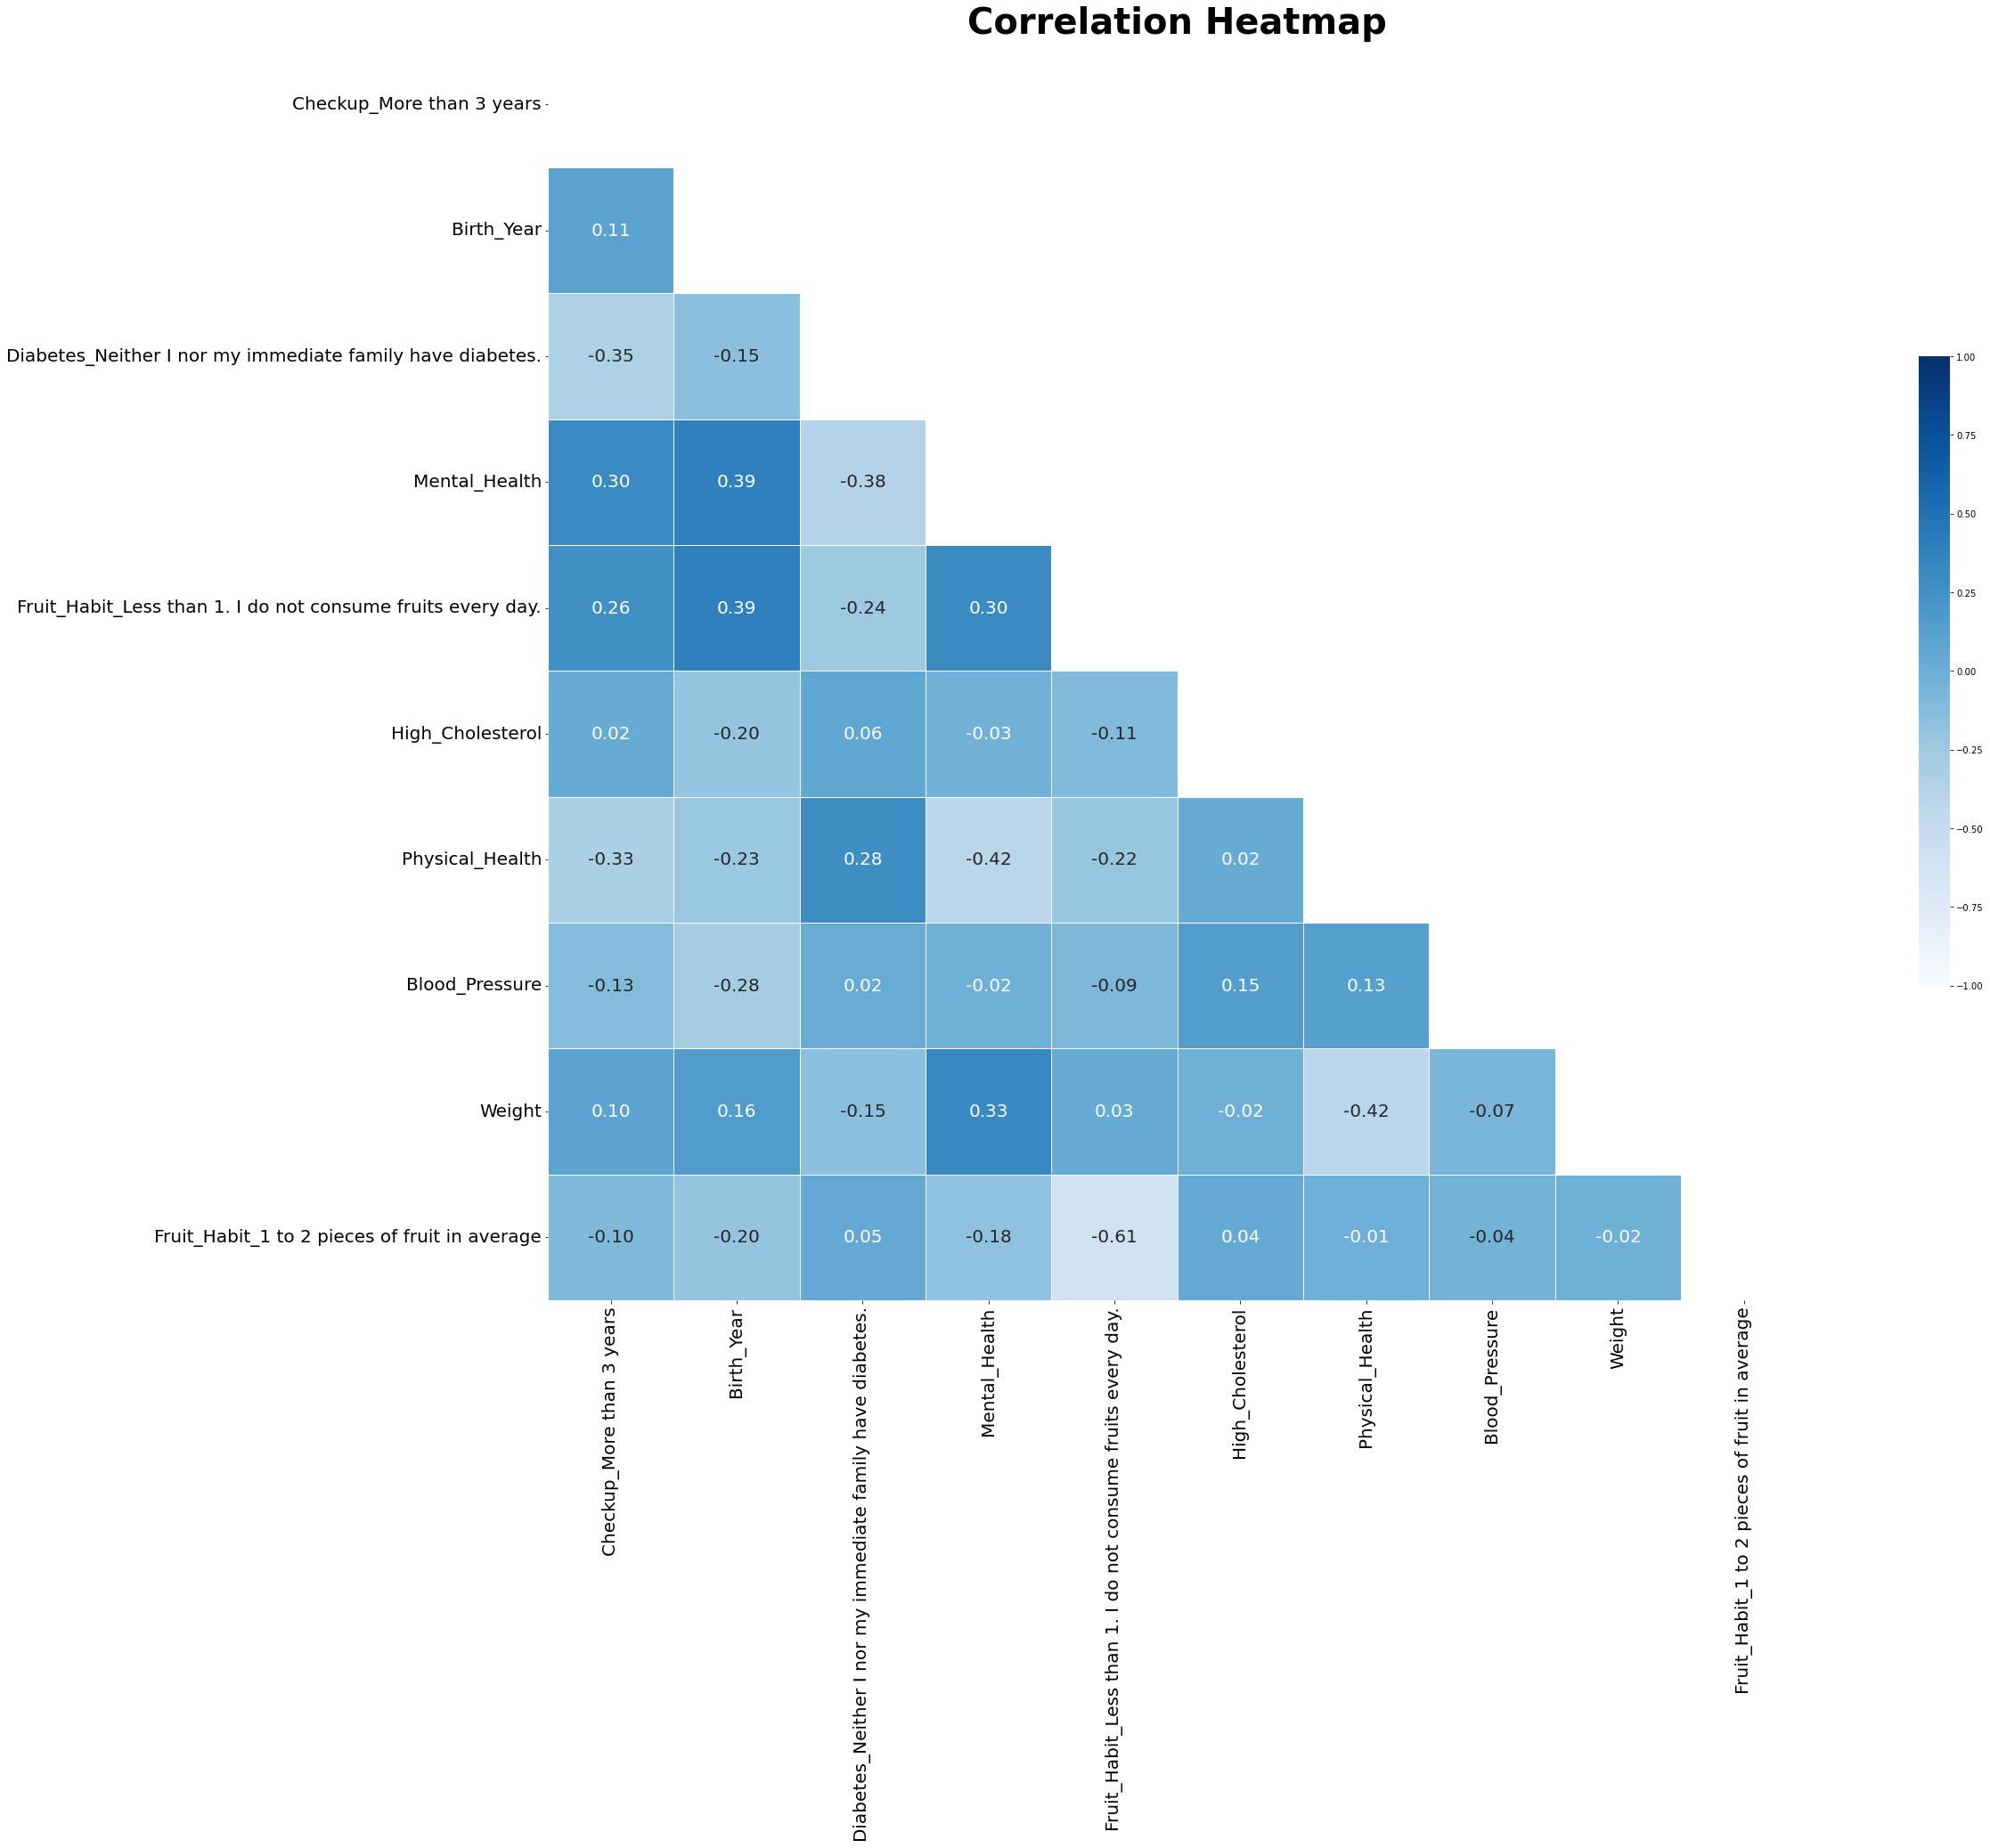

In [31]:
# Correlations analysis
# Plot
cmap = sns.color_palette('Blues', as_cmap=True)

# Computing the correlation matrix
corr = train_data[DecisionTree_columns_to_keep].corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize = (45, 26))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = 1, cbar_kws = {'shrink': 0.5}, annot = True, fmt = '.2f', annot_kws={"size":20})

#customize
plt.title('Correlation Heatmap',fontsize = 40, fontweight = 'bold')


plt.show()

In [35]:
# Saving train_data with the necessary columns

train_data = train_data[[
             'Checkup_More than 3 years',
             'Birth_Year',
             'Diabetes_Neither I nor my immediate family have diabetes.',
             'Mental_Health',
             'Fruit_Habit_Less than 1. I do not consume fruits every day.',  
             'High_Cholesterol', 
             'Physical_Health',
             'Blood_Pressure',
             'Weight',
             'Fruit_Habit_1 to 2 pieces of fruit in average',
             'Disease',
             'PatientID'
            ]] 


train_data

Checkup_More than 3 years  Birth_Year  \
0                            1        1965   
1                            0        1969   
2                            1        1974   
3                            0        1958   
4                            1        1968   
..                         ...         ...   
794                          0        1987   
795                          0        1972   
796                          1        1980   
798                          1        1975   
799                          0        1979   

     Diabetes_Neither I nor my immediate family have diabetes.  Mental_Health  \
0                                                    1                     21   
1                                                    1                      9   
2                                                    1                     26   
3                                                    0                     13   
4                                                    0                     18   
..                                                 ...                    ...   
794                                                  1                     13   
795                                                  1                     12   
796                                                  0                     23   
798                                                  1                     16   
799                                                  1                     11   

     Fruit_Habit_Less than 1. I do not consume fruits every day.  \
0                                                    1             
1                                                    1             
2                                                    1             
3                                                    1             
4                                                    0             
..                                                 ...             
794                                                  1             
795                                                  1             
796                                                  1             
798                                                  1             
799                                                  1             

     High_Cholesterol  Physical_Health  Blood_Pressure  Weight  \
0                 358                2             120      67   
1                 230                0             142      88   
2                 226                0             122      68   
3                 313                8             125      66   
4                 277                2             125      58   
..                ...              ...             ...     ...   
794               202                7             120      74   
795               204                4             144      61   
796               213                0             120      61   
798               208                0             112      75   
799               181               12             120      70   

     Fruit_Habit_1 to 2 pieces of fruit in average  Disease  PatientID  
0                                                0        1       1167  
1                                                0        1       1805  
2                                                0        1       1557  
3                                                0        0       1658  
4                                                1        1       1544  
..                                             ...      ...        ...  
794                                              0        0       1912  
795                                              0        0       1909  
796                                              0        1       1386  
798                                              0        1       1662  
799                                              0        0       

***
# 4. Feature Selection
<ul>
    <li>Split the data into x and y</li>
    <li>Run a Tree-based estimators</li>
    <li>Run Feature Importance</li>
    <li>Split the data into new variables only regarding the importante variables</li>
</ul>

***

In [38]:
# Split data again

# Creating a new x but now only regarding the columns that have impact in prediction model
# Define y again

x = train_data.drop('Disease', axis = 1).values
x

y = train_data['Disease']
y

0      1
1      1
2      1
3      0
4      1
      ..
794    0
795    0
796    1
798    1
799    0
Name: Disease, Length: 774, dtype: int64

In [39]:
# First split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 15)

# Second split
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  train_size = 0.9,
                                                  test_size = 0.1,
                                                  random_state = 15)

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

# IMPORTANTE : the larger the 'test_size' the highest the accurancy  

(557, 11)
(155, 11)
(62, 11)
(557,)
(155,)
(62,)


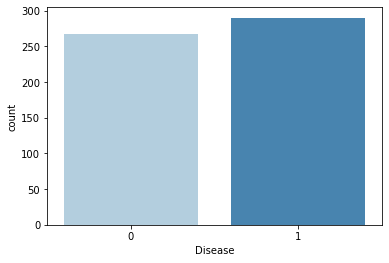

In [41]:
ax = sns.countplot(x = y_train, palette = 'Blues')

### Teorical definition of Linear and Logistic Regression 

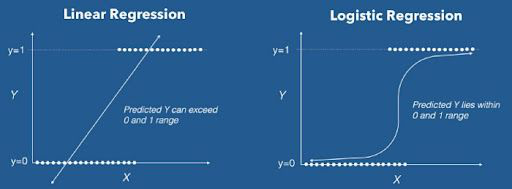

In [42]:
im = Image.open(requests.get('https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/2_what-is-logistic-regression.jpeg', stream=True).raw)
im 

***
# 5. Running Models
<ul>
    <li>Trainning our model</li>
    <li>Predict</li>
    <li>Get Coeficiente, Scores and Accuracy</li>
</ul>

***

>### A. Logistic Regression Model
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [62]:
# Trainning our model

logistic_regression_model = LogisticRegression(random_state = 10, solver='lbfgs')
logistic_regression_model.fit(x_train, y_train)


LogisticRegression(random_state=10)

In [63]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_logistic_regression = logistic_regression_model.predict(x_train)
y_pred_logistic_regression

# predict_proba - Probability estimates 

y_pred_proba_logistic_regression = logistic_regression_model.predict_proba(x_train)

# coef_ - Coefficient of the features in the decision function

coef_logistic_regression = logistic_regression_model.coef_


The Training Accuracy is:  0.8276481149012568
The Testing Accuracy is:  0.832258064516129

               precision    recall  f1-score   support

           0       0.84      0.79      0.81       267
           1       0.82      0.86      0.84       290

    accuracy                           0.83       557
   macro avg       0.83      0.83      0.83       557
weighted avg       0.83      0.83      0.83       557



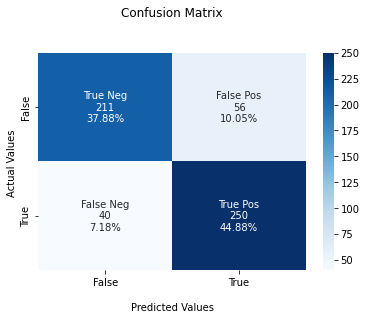

The True Positive Rate is:  [0.79026217 0.86206897]
The Average True Positive Rate is:  0.8261655689009428

This reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.

The Positive Precision Value is:  0.8261655689009428


In [64]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', logistic_regression.score(x_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', logistic_regression.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_train, y_pred_logistic_regression))

# Confusion Matrix function

cm_logistic_regression = confusion_matrix(y_train, y_pred_logistic_regression)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_logistic_regression.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logistic_regression.flatten()/np.sum(cm_logistic_regression)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_logistic_regression, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_logistic_regression = cm_logistic_regression.sum(axis=0) - np.diag(cm_logistic_regression)

FN_logistic_regression = cm_logistic_regression.sum(axis=1) - np.diag(cm_logistic_regression)

TP_logistic_regression = np.diag(cm_logistic_regression)

TN_logistic_regression = cm_logistic_regression.sum() - (FP_logistic_regression - FN_logistic_regression - TP_logistic_regression)

# Sensitivity, hit rate, recall, or positive rate

TPR_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FN_logistic_regression)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_logistic_regression)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_logistic_regression.sum()/2)
print('\nThis reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.')

# Precision or positive predictive value

PPV_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FP_logistic_regression)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_logistic_regression.sum()/2)




>### B. Decision Tree Model
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [65]:
# Trainning our model

decision_tree_model = DecisionTreeClassifier(class_weight = 'balanced',
                                             criterion = 'entropy',
                                             max_depth = 11,
                                             min_samples_split = 4, 
                                             random_state = 10)
decision_tree_model.fit(x_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, min_samples_split=4, random_state=10)

In [67]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_decision_tree = decision_tree_model.predict(x_train)
y_pred_decision_tree

# predict_proba - Probability estimates 

y_pred_proba_decision_tree = decision_tree_model.predict_proba(x_train)


The Training Accuracy is:  0.9964093357271095
The Testing Accuracy is:  0.9419354838709677

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       267
           1       1.00      0.99      1.00       290

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



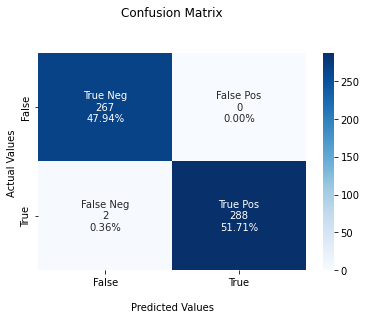

The True Positive Rate is:  [1.         0.99310345]
The Average True Positive Rate is:  0.996551724137931

The Positive Precision Value is:  0.996551724137931


In [68]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', decision_tree_model.score(x_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', decision_tree_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_train, y_pred_decision_tree))

# Confusion Matrix function

cm_decision_tree = confusion_matrix(y_train, y_pred_decision_tree)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_decision_tree.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_decision_tree.flatten()/np.sum(cm_decision_tree)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_decision_tree, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_decision_tree = cm_decision_tree.sum(axis=0) - np.diag(cm_decision_tree)

FN_decision_tree = cm_decision_tree.sum(axis=1) - np.diag(cm_decision_tree)

TP_decision_tree = np.diag(cm_decision_tree)

TN_decision_tree = cm_decision_tree.sum() - (FP_decision_tree - FN_decision_tree - TP_decision_tree)

# Sensitivity, hit rate, recall, or positive rate

TPR_decision_tree = TP_decision_tree / (TP_decision_tree + FN_decision_tree)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_decision_tree)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_decision_tree.sum()/2)

# Precision or positive predictive value

PPV_decision_tree = TP_decision_tree / (TP_decision_tree + FP_decision_tree)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_decision_tree.sum()/2)




>### C. Random Forest Model
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [72]:
# Trainning our model

random_forest_model = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 50,
                                 min_samples_split = 2,
                                 max_features = 'auto',
                                 bootstrap = False,
                                 min_samples_leaf = 1,
                                 random_state = 30,
                                 n_estimators = 10)
random_forest_model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=50,
                       n_estimators=10, random_state=30)

In [73]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_random_forest = random_forest_model.predict(x_train)
y_pred_random_forest

# predict_proba - Probability estimates 

y_pred_proba_random_forest = random_forest_model.predict_proba(x_train)


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.9806451612903225

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       290

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



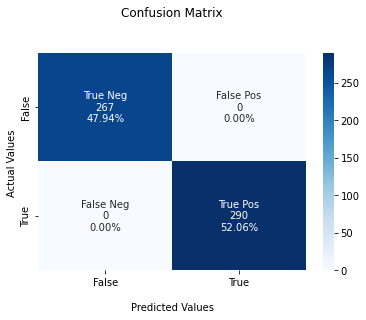

The True Positive Rate is:  [1. 1.]
The Average True Positive Rate is:  1.0

The Positive Precision Value is:  1.0


In [74]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', random_forest_model.score(x_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', random_forest_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_train, y_pred_random_forest))

# Confusion Matrix function

cm_random_forest = confusion_matrix(y_train, y_pred_random_forest)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_random_forest.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_random_forest.flatten()/np.sum(cm_random_forest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_random_forest, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_random_forest = cm_random_forest.sum(axis=0) - np.diag(cm_random_forest)

FN_random_forest = cm_random_forest.sum(axis=1) - np.diag(cm_random_forest)

TP_random_forest = np.diag(cm_random_forest)

TN_random_forest = cm_random_forest.sum() - (FP_random_forest - FN_random_forest - TP_random_forest)

# Sensitivity, hit rate, recall, or positive rate

TPR_random_forest = TP_random_forest / (TP_random_forest + FN_random_forest)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_random_forest)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_random_forest.sum()/2)

# Precision or positive predictive value

PPV_random_forest = TP_random_forest / (TP_random_forest + FP_random_forest)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_random_forest.sum()/2)




>### D. K Nearest Neighbors Model (KNN)
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [83]:
# Trainning our model
    # p = 1 - Manhatan Distance; 2 - Euclidean Distance

KNN_model = KNeighborsClassifier(n_neighbors = 2,
                                 leaf_size = 1,
                                 p = 1)

KNN_model.fit(x_train, y_train)


KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1)

In [84]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_KNN_model = KNN_model.predict(x_train)
y_pred_KNN_model

# predict_proba - Probability estimates 

y_pred_proba_KNN_model = KNN_model.predict_proba(x_train)


The Training Accuracy is:  0.8402154398563735
The Testing Accuracy is:  0.5741935483870968

               precision    recall  f1-score   support

           0       0.75      1.00      0.86       267
           1       1.00      0.69      0.82       290

    accuracy                           0.84       557
   macro avg       0.88      0.85      0.84       557
weighted avg       0.88      0.84      0.84       557



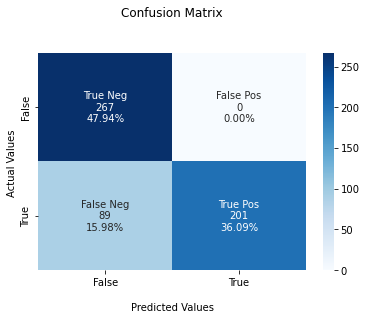

The True Positive Rate is:  [1.         0.69310345]
The Average True Positive Rate is:  0.846551724137931

The Positive Precision Value is:  0.846551724137931


In [85]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', KNN_model.score(x_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', KNN_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_train, y_pred_KNN_model))

# Confusion Matrix function

cm_KNN_model = confusion_matrix(y_train, y_pred_KNN_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_KNN_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_KNN_model.flatten()/np.sum(cm_KNN_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_KNN_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_KNN_model = cm_KNN_model.sum(axis=0) - np.diag(cm_KNN_model)

FN_KNN_model = cm_KNN_model.sum(axis=1) - np.diag(cm_KNN_model)

TP_KNN_model = np.diag(cm_KNN_model)

TN_KNN_model = cm_KNN_model.sum() - (FP_KNN_model - FN_KNN_model - TP_KNN_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_KNN_model = TP_KNN_model / (TP_KNN_model + FN_KNN_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_KNN_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_KNN_model.sum()/2)

# Precision or positive predictive value

PPV_KNN_model = TP_KNN_model / (TP_KNN_model + FP_KNN_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_KNN_model.sum()/2)

***
# Conslusion and Results

***

In [ ]:
print('\033[1;4mLogistic Regression Model Accuracy is:\033[0m', accuracy_score(y_test, prediction_test_LogisticRegression))
print('\n\033[1;4mLogistic Regression Model F1 Score Accuracy is:\033[0m', f1_score(y_test, prediction_test_LogisticRegression))
##print('\n\033[1;4mImportance in Logistic Regression Model is:\033[0m\n', feature_imp_LogisticRegression)

print('\n\n\033[1;4mDecision Tree Model Accuracy is:\033[0m', accuracy_score(y_test, prediction_test_DecisionTree))
print('\n\033[1;4mDecision Tree Model F1 Score Accuracy is:\033[0m', f1_score(y_test, prediction_test_DecisionTree))
print('\n\033[1;4mImportance in Decision Tree Model is:\033[0m\n', feature_imp_DecisionTree)

print('\n\n\033[1;4mRandom Forest Model Accuracy is:\033[0m', accuracy_score(y_test, prediction_test_RandomForest))
print('\n\033[1;4mRandom Forest Model F1 Score Accuracy is:\033[0m', f1_score(y_test, prediction_test_RandomForest))
print('\n\033[1;4mImportance in Forest Model is:\033[0m\n', feature_imp_RandomForest)